# $\frac{dN}{dr}$ Plot #
Graph is just for sanity check. What we'll actually be using is the *radial_dist* part to sample later.

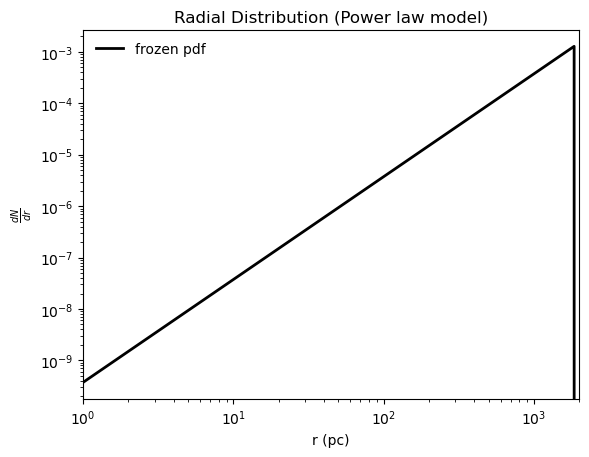

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import powerlaw, halfnorm


sample_size = 100000

fig, ax = plt.subplots(1,1)
a = 3
mean, var, skew, kurt = powerlaw.stats(a, moments='mvsk')

# set max_dist=2
max_radius = 2000
x = np.logspace(0, np.log10(max_radius), 100)

# distance-distribution
radial_dist = powerlaw(a, scale=max_radius)
ax.plot(x, radial_dist.pdf(x), 'k-', lw=2, label='frozen pdf')

# Plot Histogram

radial_dist_val = radial_dist.rvs(size=sample_size)
ax.set_xlim([x[0], x[-1]])
plt.xscale("log")
plt.yscale("log")
ax.legend(loc='best', frameon=False)
ax.set_xlabel(r"r (pc)")
ax.set_ylabel(r"$\frac{dN}{dr}$")
ax.set_title(r"Radial Distribution (Power law model)")
plt.show()


# Half-Normal Distribution #
Graph is just for sanity check. What we'll actually be using is the *abs_mag_dist* part to sample later.

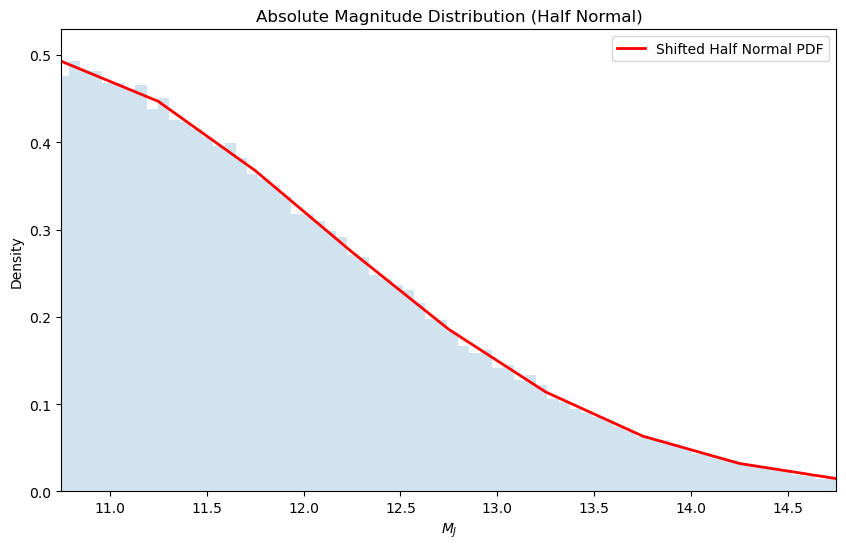

In [3]:
fig1, ax1 = plt.subplots(figsize=(10,6))
# Parameters
# minimum bin absolute mag
shift_amount = 10.5  # Amount to shift the distribution to the right

abs_mag_dist = halfnorm(loc=shift_amount, scale=1.6)

# Values and Frequencies
x = np.array([10.75, 11.25, 11.75, 12.25, 12.75, 13.25, 13.75, 14.25, 14.75])
counts = np.array([23, 20, 14, 10, 6, 7, 6, 8, 4])

# Plotting
bin_edges = np.arange(10.5, 15.5, 0.5, dtype=float)

# Combine frequencies and values into one array
# can use np.repeat
data = np.empty(np.sum(counts))
# print(data.size)
i = 0
while i<counts.size:
    j=0
    while j<counts[i]:      
        data[i] = x[i]
        j+=1
    i+=1

ax1.plot(x, abs_mag_dist.pdf(x), 'r-', lw=2, label='Shifted Half Normal PDF')
app_mag_val = abs_mag_dist.rvs(size=sample_size)

# Generated 
ax1.hist(app_mag_val, density=True, bins='auto', histtype='stepfilled', alpha=0.2)

ax1.set_xlim([x[0], x[-1]])

plt.title('Absolute Magnitude Distribution (Half Normal)')
plt.xlabel("$M_J$")
plt.ylabel('Density')
plt.legend(loc='best')
plt.show()


# Plotting Apparent Magnitude Histogram #
Values for $r$ were sampled from the distribution in the plot of $\frac{dN}{dr}$. Additionally, values for $M$, the absolute magnitude, was sampled from the second distribution. These values were inputted in the equation for apparent magnitude as a function of absolute magnitude and radial distance, a histogram was plotted from the resulting values, yielding the distribution below.

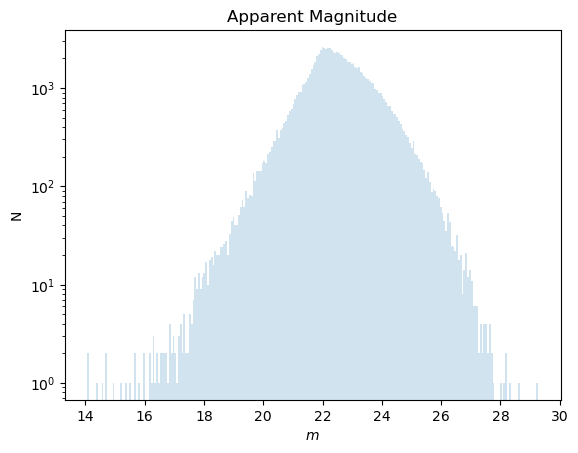

In [12]:
seed_val = 3
rng = np.random.default_rng(seed_val)

dist = radial_dist.rvs(size=sample_size, random_state=rng)
M = abs_mag_dist.rvs(size=sample_size, random_state=rng)
m = M + 5*np.log10(dist)-5
plt.hist(m, bins='auto', histtype='stepfilled', alpha=0.2)
plt.yscale("log")
plt.ylabel("N")
plt.xlabel("$m$")
plt.title("Apparent Magnitude")
plt.show()
fig.savefig("apparent-mag.png")